<a href="https://colab.research.google.com/github/Maureenchepkirui/Titanic_Survival_Prediction-and-Spam_Prediction/blob/main/MAUREEN_CHEPKIRUI_TITANIC_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

On its maiden voyage on from Southampton port on April 15, 1912 the RMS Titanic sank following a collision with an iceberg.This resulted in 1502 out of 2224 passengers and crew dying.

While many may think the survival of the passengers on board was a game of chance, it is possible to predict who had higher chances of survival.

### b) Defining the Metric for Success

Creating a model to predict the chances of survival in the titanic with an accuracy of over 80%.

### c) Understanding the context 

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

### d) Recording the Experimental Design

* Download the two datasets from the given links:

* Dataset 1 Source: [Train Dataset Source: Link (Links to an external site.), Test Dataset Source: Link (Links to an external site.)]

* Randomly partition each dataset into two parts i.e 80 - 20  sets.

* For dataset 1, because we don't have the label for the test set, we will use 
the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

* Compute the accuracy (percentage of correct classification).

* Report the confusion matrix of each classifier.

* Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.

* Suggest and apply at least one of the optimization techniques that you learned earlier this week.

* Provide further recommendations to improve both classifiers.

### e) Data Relevance

The data is very relevant, it contains many factors that predict the Y variable. This Data is hence very useful to achieve our projects

## 2. Reading the Data

In [8]:
#from pydataset import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns; sns.set(font_scale=1.2)
palette = ['blue','pink']
sns.set_palette(palette)
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [9]:
# Loading the Data from the source i.e. csv
# ---
# Dataset source = Dataset source = https://archive.org/download/train5_202002/train%20%285%29.csv
# ---
#
df=pd.read_csv("/content/train (5).csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Loading the Data from the source i.e. csv
# ---
# Dataset source = Dataset source = https://archive.org/download/test1_202002/test%20%281%29.csv
# ---
df2=pd.read_csv("/content/test (1).csv")
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We shall use the train dataset since it has our target variable (Survived) since it tells us whether  a passanger survived the titanic or not



## 3. Checking the Data

In [11]:
# Determining the no. of records in our dataset
#
df.shape

(891, 12)

The dataset has 891 records and 12 variables

In [12]:
# Previewing the top of our dataset
#
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Previewing the bottom of our dataset
# 
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [14]:
# Previewing the column names
# 
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
# Checking the number of unique classes in each column
# This helps in knowing whether a column is categorical, numerical or is an object
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Text(0.5, 1.0, 'Classes in the target(survival) variable')

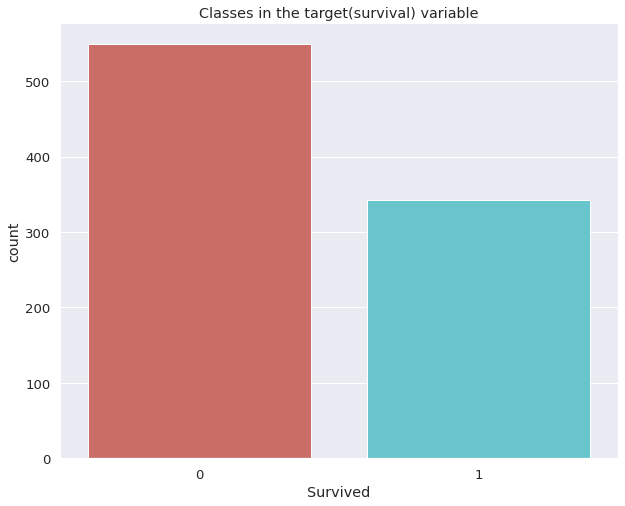

In [17]:
# Checking our target variable
# Since we are building a model to predict survival of passangers from the Titanic, 
# our target is going to be "Survived" variable from the titanic dataframe. 
# To make sure that it's a binary variable, we shall use Seaborn's countplot() function.
# 
plt.figure(figsize=(10,8))
sb.countplot(x='Survived',data=df, palette='hls')
plt.title("Classes in the target(survival) variable")

From the output we see that the Survived variable is binary (0 - did not survive / 1 - survived)

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.


### a.Validation

## 5. Tidying the Dataset

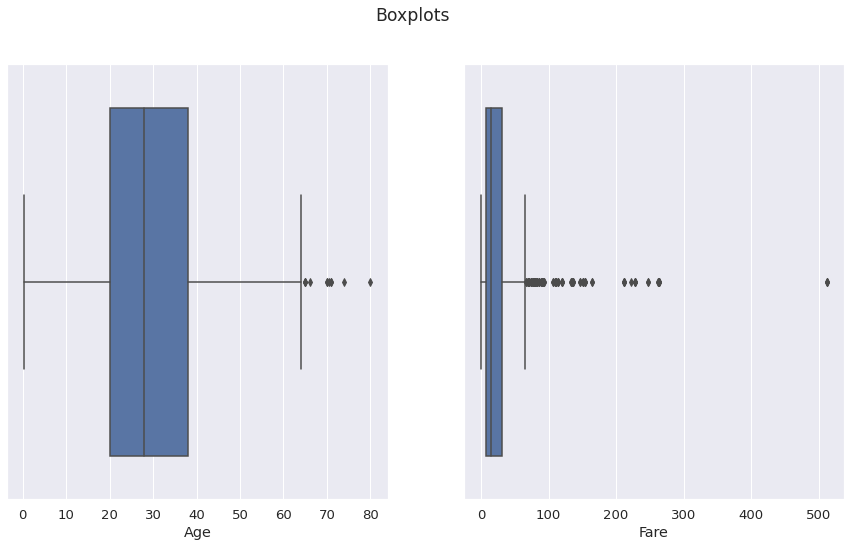

In [18]:
# Checking for Outliers
#Checking outliers in the age and fare columns
fig, axes = plt.subplots(1,2, figsize=(15, 8))
fig.suptitle('Boxplots')
sns.boxplot(df['Age'], ax=axes[0])
sns.boxplot(df['Fare'], ax=axes[1])
plt.show()

We have outliers in our dataset but we shall not drop them because
* It is possible to have a passanger who is 80 years old.
* It also possible to pay fare that is more than 500 because some passangers were in private rooms(cabin) which means that they might have paid more money.

In [19]:
# Identifying the Missing Data
#
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have null values but we shall not drop them, instead we shall look for ways of filling the null values.
Cabin has the largest number of null values.

Text(0.5, 1.0, 'Missing Values')

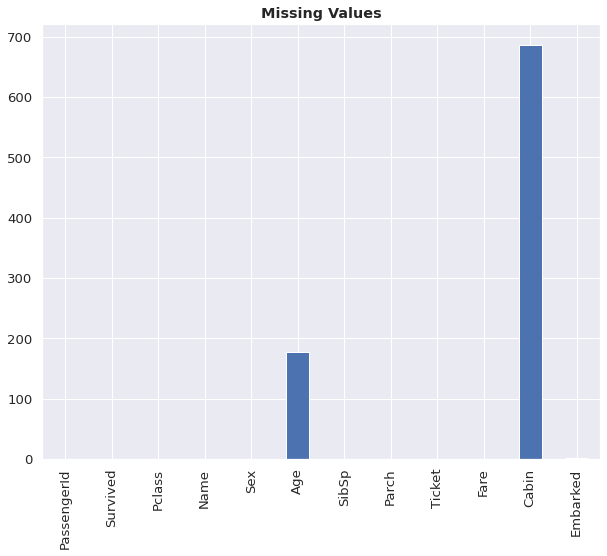

In [20]:
#Lets vizualize the missing values
plt.figure(figsize=(10,8))
df.isnull().sum().plot(kind="bar")
plt.title("Missing Values",weight="bold")

Text(0.5, 1.0, 'Age vs passenger Classes ')

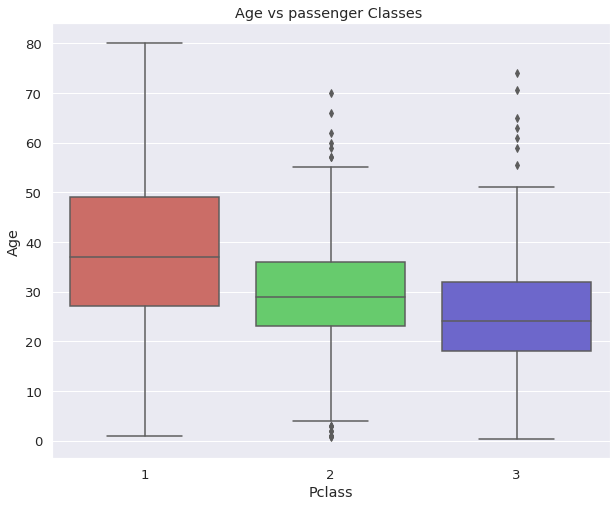

In [21]:
# Dealing with the Missing Data
#We shall look at how passenger age is related to their passanger class on the boat.
# 
plt.figure(figsize=(10,8))
sb.boxplot(x='Pclass', y='Age', data=df, palette='hls')
plt.title("Age vs passenger Classes ")

From the box plot, it looks like the average age of 1st class passengers is about 37, 2nd class passengers is 29, and 3rd class pasengers is 24.

The younger passengers are more likely to be in 3rd class and the older passengers are more likely to be 1st class.

We shall fill the null values using the average ages in the different classes.

In [22]:
#Dealing with null values
# we shall checks the value of the Pclass and assigns an average age value  of passengers in that class.
#
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [23]:
#we shall apply the  function and check again for null value.
#
df['Age'] = df[['Age', 'Pclass']].apply(age_approx, axis=1)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
#Dealing with null values in the Embarked column
 #We shall use mode to fill the null values
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [25]:
#Cabin is a private room on a ship or boat
#We shall create a new colum that show whether a passanger was in the cabinor not 
#The replace the null values with 0 and 1 for the rows that are not null. 
df['cabin'] = [0 if str(x) == 'nan' else 1 for x in df['Cabin']]

#Then drop the former Cabin column and remail with cabin
df.drop('Cabin', axis=1, inplace=True)


We replaced the null values with 0 and 1 for the rows that are not null so that it can tell us whether a passanger was in the cabin or not.

In [26]:
#cross checking the null values again
df.isnull().sum().sum()

0

In [27]:
# We shall  drop all the variables that aren't relevant for our analysis and  predicting survival. 
#We should  keep the following:

# Survived - This variable is our target variable
# Pclass - Does a passenger's class on the boat affect their survivability?
# Sex - Could a passenger's gender impact their survival rate?
# Age - Does a person's age impact their survival rate?
# SibSp - Does the number of relatives on the boat (that are siblings or a spouse) affect a person survivability? Probability
# Parch - Does the number of relatives on the boat (that are children or parents) affect a person survivability? Probability
# Fare - Does the fare a person paid effect his survivability? Maybe - let's keep it.
#cabin- was the passanger in the cabin or not?
# Embarked - Does a person's point of embarkation matter? It depends on how the boat was filled... Let's keep it.
#name, ticket number, and passenger ID number? They're irrelavant for predicting survivability. 

df = df.drop(['PassengerId','Name','Ticket'], 1)
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


We dropped 'PassengerId','Name','Ticket' beacuse the are not useful in our analysis

## 6. Exploratory Analysis

## Univariate Analysis

In [28]:
#Numerical variables
#Measures of Central Tendency
#we start by picking the numerical variables

#Mode
numerical_data=df[['Age','SibSp','Parch','Fare']]
numerical_data.mode()


,Age,SibSp,Parch,Fare
0,24.0,0,0,8.05


In [29]:
#Mean
numerical_data=df[['Age','SibSp','Parch','Fare']]
numerical_data.mean()

Age      29.066409
SibSp     0.523008
Parch     0.381594
Fare     32.204208
dtype: float64

In [30]:
#Median
numerical_data=df[['Age','SibSp','Parch','Fare']]
numerical_data.median()

Age      26.0000
SibSp     0.0000
Parch     0.0000
Fare     14.4542
dtype: float64

In [31]:
#Measures of dispersion
#standard deviation
numerical_data=df[['Age','SibSp','Parch','Fare']]
numerical_data.std()

Age      13.244532
SibSp     1.102743
Parch     0.806057
Fare     49.693429
dtype: float64

In [32]:
#Kurtosis
numerical_data=df[['Age','SibSp','Parch','Fare']]
numerical_data.kurt()

Age       0.782790
SibSp    17.880420
Parch     9.778125
Fare     33.398141
dtype: float64

In [33]:
#Skewness
numerical_data=df[['Age','SibSp','Parch','Fare']]
numerical_data.skew()

Age      0.548256
SibSp    3.695352
Parch    2.749117
Fare     4.787317
dtype: float64

In [34]:
#variance
numerical_data=df[['Age','SibSp','Parch','Fare']]
numerical_data.var()

Age       175.417624
SibSp       1.216043
Parch       0.649728
Fare     2469.436846
dtype: float64

In [35]:
#Quantiles
numerical_data=df[['Age','SibSp','Parch','Fare']]
numerical_data.quantile([0.25,0.50,0.75])

,Age,SibSp,Parch,Fare
0.25,22.0,0.0,0.0,7.9104
0.50,26.0,0.0,0.0,14.4542
0.75,37.0,1.0,0.0,31.0000


In [36]:
##Categorical data
#Frequency table for the categorical data
# Frequency Tables for the different categorical variables

print(df['Embarked'].value_counts())
print('\n')
print(df['Pclass'].value_counts())
print('\n')
print(df['Survived'].value_counts())
print('\n')
print(df['Sex'].value_counts())
print('\n')
print(df['cabin'].value_counts())

S    646
C    168
Q     77
Name: Embarked, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


0    687
1    204
Name: cabin, dtype: int64


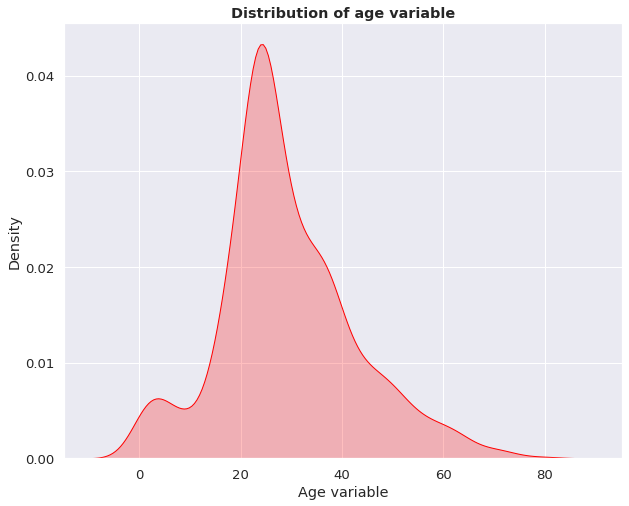

In [37]:
#plot showing distributions of ages
f, ax = plt.subplots(figsize=(10,8))
x = df['Age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='red')
ax.set_title("Distribution of age variable",weight='bold')
plt.show()

From the categorical data we can make the following observations;

*    Majority of the passengers embarked at the Southampton port (646),followed by Cherboug (168) then  Queenstown(77).
*  Majorinty of the passangers were in PClass 3 with 491 passangers, class 1 with 216 passangers and class 2 with 184 passangers
* Majority of the passengers in our Titanic dataset 577, were male passangers,  while 314 passangers were female.
*   Majority of the passengers in our Titanic dataset 549 passangers, survived the crash while 342 passengers did not survive.
*  Majority of the passangers were not in the cabin(687 passaners) and 204 passangers were in the cabin.
*   From the kde plot we can see that the number of passangers increases across the ages but the number starts drpping from age 30

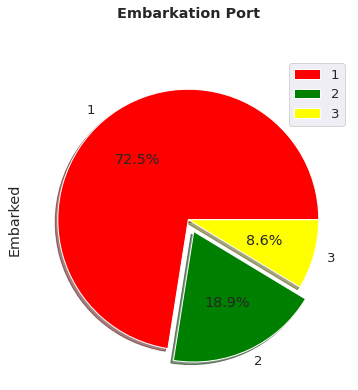

In [71]:
#Pie charts
# Pie chart of the ports of embarkation
df['Embarked'].value_counts().plot(kind='pie',shadow = True,explode=(0,0.1,0), colors=['red',"green","yellow"], autopct='%1.1f%%')
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.legend(loc='upper right')
plt.title('Embarkation Port', y=1.1,weight="bold")
plt.show()

Majority of the passengers embarked at the Southampton port (72.5%),followed by Cherboug (18.9%) then Queenstown(8.6%)

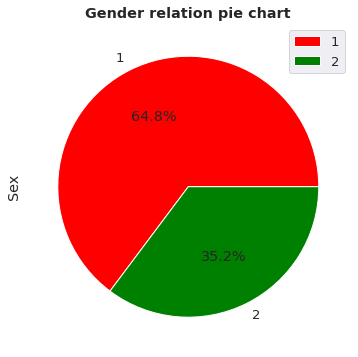

In [70]:
# Pie chart of the gender distribution
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red','green'])
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.legend(loc='upper right')
plt.title('Gender relation pie chart', y=1, fontweight='bold')
plt.show()

Majority of the passangers were male with 64.8%

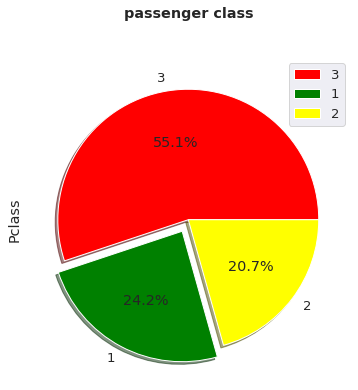

In [72]:
# Pie chart of the gender distribution
df['Pclass'].value_counts().plot(kind='pie',shadow = True,explode=(0,0.1,0), colors=['red',"green","yellow"], autopct='%1.1f%%')
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.legend(loc='upper right')
plt.title('passenger class', y=1.1,weight="bold")
plt.show()

Majority of the passangers were in passanger class 3 with 55.1%

## Bivariate Analysis

In [41]:
#frequecy table for sex vs Survived 
df[["Sex","Survived"]].value_counts(sort = False)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

Text(0.5, 1.0, 'passanger distibution  with sex')

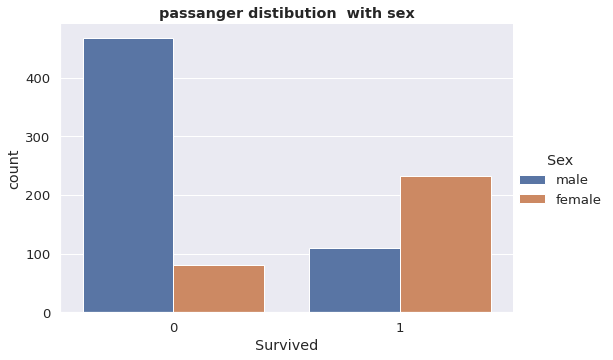

In [42]:
#Passanger distribution with sex
sns.catplot(x='Survived',hue='Sex',data=df,kind='count',aspect=1.5)
plt.title('passanger distibution  with sex',weight='bold')

Majority of the people who died were male passangers
Majority of the people who survived were female passangers 
Most people died compared to those who survived.

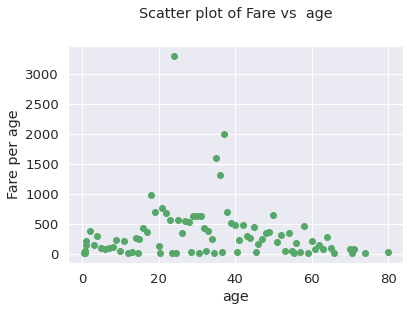

In [43]:
# Plotting our scatterplot Scatter plot of Fare vs  age

nc=df.groupby('Age')['Fare'].sum().reset_index(name='Fare per age')
nc
plt.scatter(nc["Age"] , nc['Fare per age'], c='g')
plt.xlabel("age")
plt.ylabel('Fare per age')
plt.title("Scatter plot of Fare vs  age", y=1.1)
plt.show()

As the age increases the passanger fare also increases slightly.

In [44]:
#frequecy table for sex cabin vs Survived
df[["cabin","Survived"]].value_counts(sort = False)

cabin  Survived
0      0           481
       1           206
1      0            68
       1           136
dtype: int64

Text(0.5, 1.0, 'passanger distibution in the cabin vs survived')

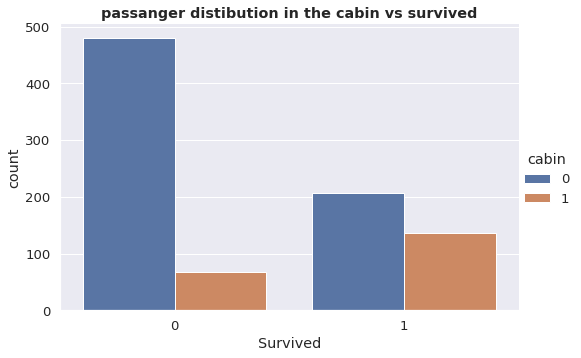

In [45]:
#passanger distibution in the cabin vs survived"
sns.catplot(x='Survived',hue='cabin',data=df,kind='count',aspect=1.5)
plt.title("passanger distibution in the cabin vs survived" ,weight='bold')

Most of the passangers who died were not in the cabin

In [46]:
#frequecy table for sex cabin vs Survived
df[["cabin","Pclass"]].value_counts(sort = False)

cabin  Pclass
0      1          40
       2         168
       3         479
1      1         176
       2          16
       3          12
dtype: int64

Most of the passangers were in class 3 and were not in the cabin

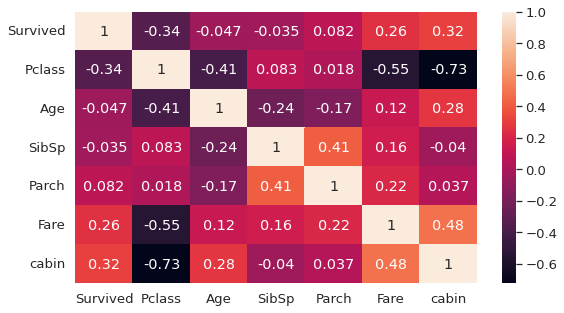

In [47]:
# Checking for independence between features¶
# 
plt.figure(figsize=(9, 5))
sb.heatmap(df.corr(),annot=True) 

observations;
* The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself.
* There is a strong negative correlation ( -0.73) between cabin and pclass
* There is a strong negative correlation ( -0.55) between fare and pclass  
* There is a moderate negative correlation ( -0.41) between age and pclass  


In [48]:
#Checking multicollinearity
# Pick independent variables only.
independent=df.drop(columns=["Survived"])

# Let's display the correlations between the variables
correlations=independent.corr()
correlations

,Pclass,Age,SibSp,Parch,Fare,cabin
Pclass,1.000000,-0.408487,0.083081,0.018443,-0.549500,-0.725541
Age,-0.408487,1.000000,-0.243526,-0.171095,0.123784,0.276032
SibSp,0.083081,-0.243526,1.000000,0.414838,0.159651,-0.040460
Parch,0.018443,-0.171095,0.414838,1.000000,0.216225,0.036987
Fare,-0.549500,0.123784,0.159651,0.216225,1.000000,0.482075
cabin,-0.725541,0.276032,-0.040460,0.036987,0.482075,1.000000


In [49]:
# Checking for multicollinearity using the VIF 
vif= pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
vif

,Pclass,Age,SibSp,Parch,Fare,cabin
Pclass,2.708934,0.568114,-0.096325,-0.132177,0.768393,1.439194
Age,0.568114,1.284293,0.209827,0.102467,0.087904,0.020007
SibSp,-0.096325,0.209827,1.280338,-0.450612,-0.204887,0.039434
Parch,-0.132177,0.102467,-0.450612,1.264447,-0.254791,-0.066356
Fare,0.768393,0.087904,-0.204887,-0.254791,1.617432,-0.245353
cabin,1.439194,0.020007,0.039434,-0.066356,-0.245353,2.161000


## Data Preprocessing

In [50]:
#installing category encoder
!pip install category_encoders
# import category encoders

import category_encoders as ce

     |████████████████████████████████| 82 kB 432 kB/s 


In [51]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(df.columns)
df = encoder.fit_transform(df)
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin
0,0,3,1,22.0,1,0,7.2500,1,0
1,1,1,2,38.0,1,0,71.2833,2,1


We encoded categorical data using ordinal encoder

## 7. Implementing the Solution

In [52]:
#Splitting our dataset into target and features
X=df.drop(["Survived"],1)
y=df[["Survived"]]

#Survived column is our target variable as it tells us whether someone survived or not

## a) 80-20 Train and Test Set Split

In [53]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# We will perform feature scalling using standard scaller
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
#hypeparameter tuning
from sklearn.model_selection import GridSearchCV
params = { 'n_neighbors' : [5,7,9,11,13,15],
            'weights' : ['uniform','distance'],
             "p":[1,2],
            'weights': ['uniform','distance'],
             "leaf_size" : [1,2,3,4,5],
             'metric' : ['minkowski','euclidean','manhattan']}
knn = KNeighborsClassifier()
#fitting the model with the best parameters
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'leaf_size': 1,
 'metric': 'minkowski',
 'n_neighbors': 13,
 'p': 2,
 'weights': 'uniform'}

In [55]:
# fitting our model
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(leaf_size=1,metric="minkowski",n_neighbors= 13,p= 2,weights='uniform')
classifier.fit(X_train, y_train)
#Making predictions

y_pred=classifier.predict(X_test)

# The confusion_matrix and classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[99 11]
 [24 45]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       110
           1       0.80      0.65      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



From the confusion matrix, we can see that (99+45) were predicted correcly and (11+24) were not predicted correctly.

From the classification report,the 2 classes have the same precision and  class 0 has a higher recall than class 1 (+25%)

The accuracy of the model is 80% 



## b) 70-30 Train and Test Set Split

In [56]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# We will perform feature scalling using standard scaller
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
#hypeparameter tuning
from sklearn.model_selection import GridSearchCV
params = { 'n_neighbors' : [5,7,9,11,13,15],
            'weights' : ['uniform','distance'],
             "p":[1,2],
            'weights': ['uniform','distance'],
             "leaf_size" : [1,2,3,4,5],
             'metric' : ['minkowski','euclidean','manhattan']}
knn = KNeighborsClassifier()
#fitting the model with the best parameters
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'leaf_size': 1,
 'metric': 'minkowski',
 'n_neighbors': 15,
 'p': 1,
 'weights': 'uniform'}

In [58]:
# fitting our model
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(leaf_size=1,metric="minkowski",n_neighbors= 15,p= 1,weights='uniform')
classifier.fit(X_train, y_train)
#Making predictions

y_pred=classifier.predict(X_test)

# The confusion_matrix and classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[151  17]
 [ 29  71]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       168
           1       0.81      0.71      0.76       100

    accuracy                           0.83       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.83      0.83      0.83       268



From the confusion matrix, we can see that (151+71) were predicted correcly and (29+17) were not predicted correctly.

From the classification report,class 0 has a higher  precision (+3) and class 0 has a higher recall than class 1 (+11%)

The accuracy of the model is 83%

## C)60-40 train and test set split

In [59]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# We will perform feature scalling using standard scaller
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
#hypeparameter tuning
from sklearn.model_selection import GridSearchCV
params = { 'n_neighbors' : [5,7,9,11,13,15],
            'weights' : ['uniform','distance'],
             "p":[1,2],
            'weights': ['uniform','distance'],
             "leaf_size" : [1,2,3,4,5],
             'metric' : ['minkowski','euclidean','manhattan']}
knn = KNeighborsClassifier()
#fitting the model with the best parameters
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'leaf_size': 1,
 'metric': 'minkowski',
 'n_neighbors': 11,
 'p': 2,
 'weights': 'uniform'}

In [61]:
# fitting our model
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(leaf_size=1,metric="minkowski",n_neighbors= 11,p= 2,weights='uniform')
classifier.fit(X_train, y_train)
#Making predictions

y_pred=classifier.predict(X_test)

# The confusion_matrix and classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[198  23]
 [ 45  91]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       221
           1       0.80      0.67      0.73       136

    accuracy                           0.81       357
   macro avg       0.81      0.78      0.79       357
weighted avg       0.81      0.81      0.81       357



From the confusion matrix, we can see that (198+91) were predicted correcly and (23+45) were not predicted correctly.

From the classification report,class 0 has a higher precision than class 1 (+1%)and class 0 has a higher recall than class 1 (+27%)

The accuracy of the model is 81%

The 70-30 train and test set split has the highest accuracy compared to other models. It has an accuracy of 83 % which is higher than the other models.

We shall perform data reduction to see how our model will work.

## 8. Challenging the solution

We can challenge our solution by implementing dimensionality reduction techniques such as LDA and PCA as a way of optimization and compare the performances of our models

1. Principal Component Analysis

In [62]:
#Splitting our dataset into target and features
X=df.drop(["Survived"],1)
y=df[["Survived"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#scalling the data
# standardize our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
# Data Reduction
#We shall use PCA because it maintains variance spread across the data
#Hence, all four of the features in the feature set will be returned for both the training and test sets.
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [64]:
#hypeparameter tuning
from sklearn.model_selection import GridSearchCV
params = { 'n_neighbors' : [5,7,9,11,13,15],
            'weights' : ['uniform','distance'],
             "p":[1,2],
            'weights': ['uniform','distance'],
             "leaf_size" : [1,2,3,4,5],
             'metric' : ['minkowski','euclidean','manhattan']}
knn = KNeighborsClassifier()
#fitting the model with the best parameters
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'leaf_size': 1,
 'metric': 'minkowski',
 'n_neighbors': 9,
 'p': 1,
 'weights': 'uniform'}

In [65]:
# fitting our model
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(leaf_size=4,metric="minkowski",n_neighbors= 9,p= 1,weights='uniform')
classifier.fit(X_train, y_train)
#Making predictions

y_pred=classifier.predict(X_test)

# The confusion_matrix and classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[149  19]
 [ 34  66]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       168
           1       0.78      0.66      0.71       100

    accuracy                           0.80       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.80      0.80       268



After reducing the data, we can see that;
From the confusion matrix, we can see that (149+19) were predicted correcly and (34+19) were not predicted correctly.

From the classification report,class 0 has a higher precision than class 1 (+3%)and class 0 has a higher recall than class 1 (+23%)

The accuracy of the model drops to 80%

 2) Linear Discriminant Analysis

In [66]:
#Splitting our dataset into target and features
X=df.drop(["Survived"],1)
y=df[["Survived"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#scalling the data
# standardize our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Import the LDA class from the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Specify the n_components as 1 so as to check the performance of our classifier with a single linear discriminant
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [67]:
#hypeparameter tuning
from sklearn.model_selection import GridSearchCV
params = { 'n_neighbors' : [5,7,9,11,13,15],
            'weights' : ['uniform','distance'],
             "p":[1,2],
            'weights': ['uniform','distance'],
             "leaf_size" : [1,2,3,4,5],
             'metric' : ['minkowski','euclidean','manhattan']}
knn = KNeighborsClassifier()
#fitting the model with the best parameters
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'leaf_size': 1,
 'metric': 'minkowski',
 'n_neighbors': 5,
 'p': 1,
 'weights': 'uniform'}

In [68]:
# fitting our model
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(leaf_size=1,metric="minkowski",n_neighbors= 5,p= 1,weights='uniform')
classifier.fit(X_train, y_train)
#Making predictions

y_pred=classifier.predict(X_test)

# The confusion_matrix and classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[143  25]
 [ 32  68]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       168
           1       0.73      0.68      0.70       100

    accuracy                           0.79       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



After reducing the data, we can see that; From the confusion matrix, we can see that (143+68) were predicted correcly and (32+25) were not predicted correctly.

From the classification report,class 0 has a higher precision than class 1 (+9%)and class 0 has a higher recall than class 1 (+24%)

The accuracy of the model drops to 79%

After performing the LDA reduction technique on our data when the train-test split is 70-30, we realize that the accuracy score reduces from 83% to 79% which means that for us to achieve a higher prediction accuracy score, we need to include all features of our dataset rather than use a single linear discriminant.

## 9. Follow up questions

### a). Did we have the right data?

we had the right data which was relevant in helping us predict whether a passenger survived or not in our Titanic dataset.

### b). Do we need other data to answer our question?

No. The data we was sufficient for our prediction.